# Model Testing

# import dataset

In [1]:
from PIL import Image, ImageOps
import glob
import numpy as np
import seaborn as sns

images = []
labels = []
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/good/*"):
    images.append(np.asarray(ImageOps.grayscale(Image.open(f))))
    labels.append(1)
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/bad/*"):
    images.append(np.asarray(ImageOps.grayscale(Image.open(f))))
    labels.append(0)
    
images = np.array(images)
labels = np.array(labels)

In [2]:
print("{} images".format(len(images)))
print("{}".format(images.shape))

189 images
(189, 3024, 4032)


In [3]:
import matplotlib.pyplot as plt

class 1


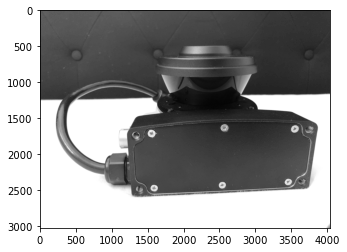

In [4]:
num = 0
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

## sklearn

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle

In [6]:
#pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=40)), ('svc', SVC())])

In [7]:
#pipe.fit(images[60:100].reshape(images[60:100].shape[0],-1),labels[60:100]) --current model
#pipe.fit(images[40:120].reshape(images[40:120].shape[0],-1),labels[40:120])

In [9]:
with open('/home/dmarq/school/CSE120/model.pkl','rb') as file:
    pipe = pickle.load(file)

In [10]:
# trained set
pipe.score(images[60:100].reshape(images[60:100].shape[0],-1),labels[60:100]) 
#pipe.score(images[40:120].reshape(images[40:120].shape[0],-1),labels[40:120])

1.0

In [11]:
# testing set
pipe.score(images[:60].reshape(images[:60].shape[0],-1),labels[:60])

0.9833333333333333

In [12]:
# testing set
pipe.score(images[120:].reshape(images[120:].shape[0],-1),labels[120:])

1.0

In [13]:
#with open('model.pkl','wb') as file:
#    pickle.dump(pipe,file)

In [13]:
conf = np.zeros((2,2))
for i,im in enumerate(images):
    if i < 60 or i > 120:
        conf[labels[i],pipe.predict([images[i].reshape(-1)])[0]] += 1

Text(0.5, 15.0, 'prediction')

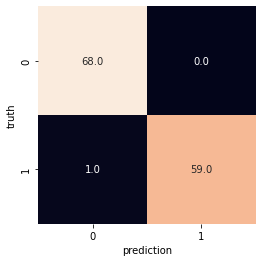

In [14]:
sns.heatmap(conf, annot=True, fmt="", cbar=False, square=True)
plt.ylabel('truth')
plt.xlabel('prediction')

In [30]:
for i, (pipe.predict(images[:60].reshape(images[:60].shape[0],-1))==labels[:60])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True])

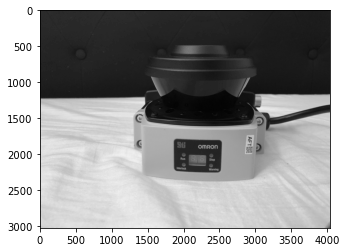

In [25]:
plt.imshow(images[58],cmap='gray')

In [18]:
images.shape

(189, 3024, 4032)